<a href="https://colab.research.google.com/github/2203A52119/2119_DAUP/blob/main/2203A52119_DAPU_LAB10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Probability of at least 4 smokers: 0.3503892815999998


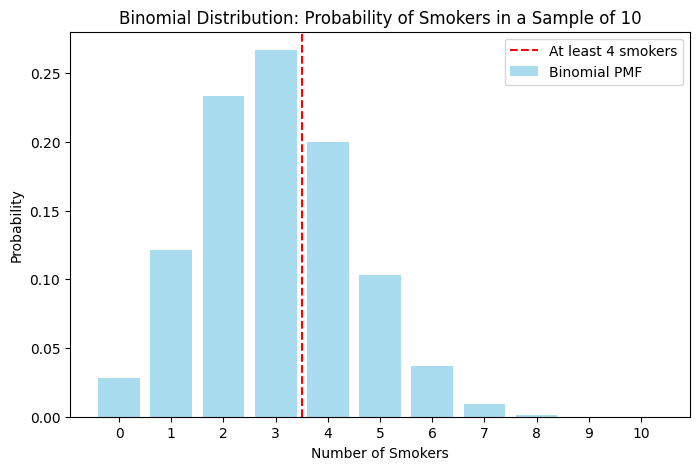

Probability of exactly 5 high-expense individuals: 0.10318229431910408
Cumulative probability of at most 5: 0.9389485703823359


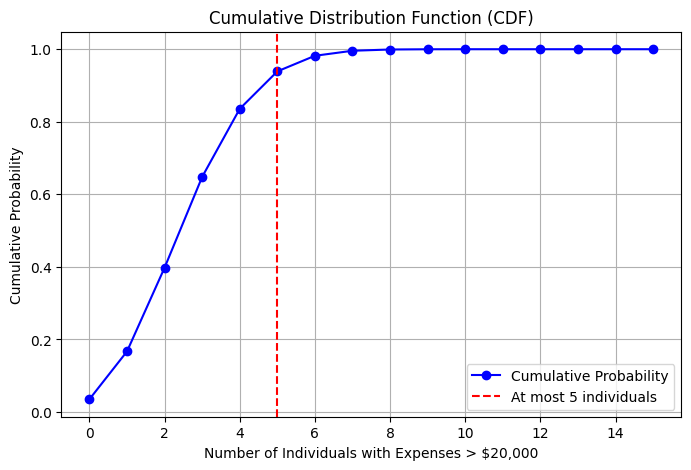

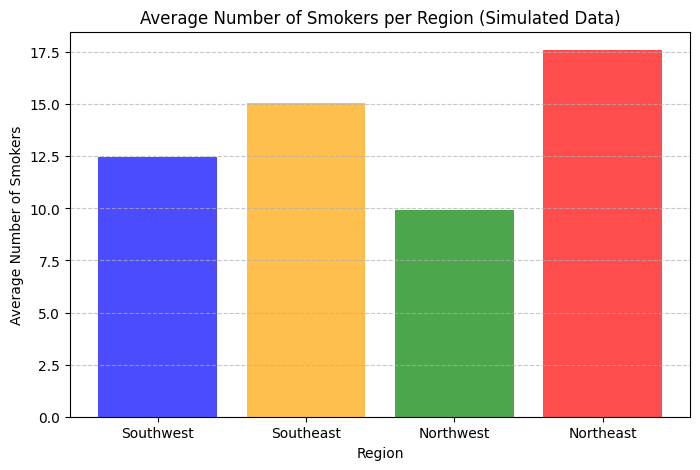

           Expected  Simulated Mean
Southwest      12.5          12.466
Southeast      15.0          15.064
Northwest      10.0           9.923
Northeast      17.5          17.602


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Load the dataset
file_path = "/content/insurance.csv"
df = pd.read_csv(file_path)

# Question 1(a): Probability of at least 4 smokers in a sample of 10
p_smoker = 0.3  # Given probability of smokers
n_sample = 10   # Sample size
prob_at_least_4 = 1 - binom.cdf(3, n_sample, p_smoker)
print("Probability of at least 4 smokers:", prob_at_least_4)

# Question 1(b): Plot Binomial Distribution
x = np.arange(0, n_sample + 1)
y = binom.pmf(x, n_sample, p_smoker)
plt.figure(figsize=(8, 5))
plt.bar(x, y, color='skyblue', alpha=0.7, label="Binomial PMF")
plt.axvline(3.5, color='red', linestyle='dashed', label="At least 4 smokers")
plt.xlabel("Number of Smokers")
plt.ylabel("Probability")
plt.title("Binomial Distribution: Probability of Smokers in a Sample of 10")
plt.xticks(range(n_sample + 1))
plt.legend()
plt.show()

# Question 2(a): Probability of exactly 5 individuals with expenses > $20,000
p_high_expense = 0.2
n_sample_15 = 15
prob_exactly_5 = binom.pmf(5, n_sample_15, p_high_expense)
print("Probability of exactly 5 high-expense individuals:", prob_exactly_5)

# Question 2(b): Cumulative probability of at most 5 individuals with expenses > $20,000
prob_at_most_5 = binom.cdf(5, n_sample_15, p_high_expense)
print("Cumulative probability of at most 5:", prob_at_most_5)

# Question 2(c): Plot CDF for medical expenses
x = np.arange(0, n_sample_15 + 1)
y_cdf = binom.cdf(x, n_sample_15, p_high_expense)
plt.figure(figsize=(8, 5))
plt.plot(x, y_cdf, marker='o', linestyle='-', color='blue', label="Cumulative Probability")
plt.axvline(5, color='red', linestyle='dashed', label="At most 5 individuals")
plt.xlabel("Number of Individuals with Expenses > $20,000")
plt.ylabel("Cumulative Probability")
plt.title("Cumulative Distribution Function (CDF)")
plt.legend()
plt.grid(True)
plt.show()

# Question 3(a): Simulate smokers per region
n_simulation = 1000
n_individuals = 50
p_southwest, p_southeast, p_northwest, p_northeast = 0.25, 0.30, 0.20, 0.35
southwest_sim = binom.rvs(n_individuals, p_southwest, size=n_simulation)
southeast_sim = binom.rvs(n_individuals, p_southeast, size=n_simulation)
northwest_sim = binom.rvs(n_individuals, p_northwest, size=n_simulation)
northeast_sim = binom.rvs(n_individuals, p_northeast, size=n_simulation)
simulated_data = pd.DataFrame({"Southwest": southwest_sim, "Southeast": southeast_sim, "Northwest": northwest_sim, "Northeast": northeast_sim})

# Question 3(b): Visualize smokers per region
mean_smokers = simulated_data.mean()
plt.figure(figsize=(8, 5))
plt.bar(mean_smokers.index, mean_smokers.values, color=['blue', 'orange', 'green', 'red'], alpha=0.7)
plt.xlabel("Region")
plt.ylabel("Average Number of Smokers")
plt.title("Average Number of Smokers per Region (Simulated Data)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Question 3(c): Compute expected vs simulated values
expected_smokers = {"Southwest": n_individuals * p_southwest, "Southeast": n_individuals * p_southeast, "Northwest": n_individuals * p_northwest, "Northeast": n_individuals * p_northeast}
comparison_df = pd.DataFrame({"Expected": expected_smokers, "Simulated Mean": mean_smokers})
print(comparison_df)
